In [3]:
!pip install opencv-python

  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl (39.5 MB)


In [5]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

In [3]:
data_dir = r"C:\Users\pnepo\Downloads\dogs-vs-cats\train\train"
img_size = 64 

In [5]:
def load_data(data_dir, files):
    X = []
    y = []
    for file in files:
        label = 1 if "dog" in file else 0
        img_path = os.path.join(data_dir, file)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (img_size, img_size))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            X.append(img.flatten())  # Flatten the image to 1D
            y.append(label)
    return np.array(X), np.array(y)

In [7]:
all_files = os.listdir(data_dir)
cats = [f for f in all_files if "cat" in f][:1000]
dogs = [f for f in all_files if "dog" in f][:1000]
subset_files = cats + dogs

In [9]:
X, y = load_data(data_dir, subset_files)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
print("Training SVM...")
svm = SVC(kernel='linear', verbose=True)
svm.fit(X_train, y_train)

Training SVM...
[LibSVM]

SVC(kernel='linear', verbose=True)

In [14]:
y_pred = svm.predict(X_test)
print("\n📈 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📝 Classification Report:\n", classification_report(y_test, y_pred))


📈 Accuracy: 0.5275

📝 Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.58      0.55       199
           1       0.53      0.47      0.50       201

    accuracy                           0.53       400
   macro avg       0.53      0.53      0.53       400
weighted avg       0.53      0.53      0.53       400



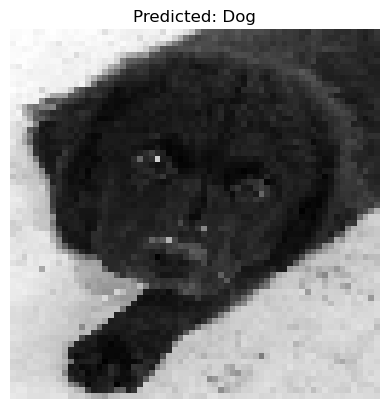

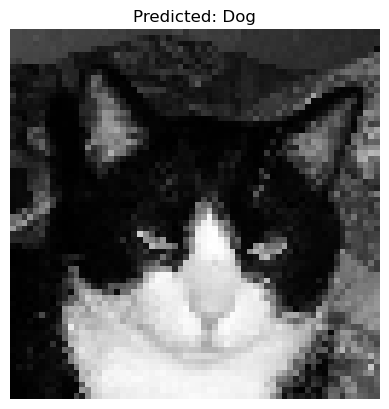

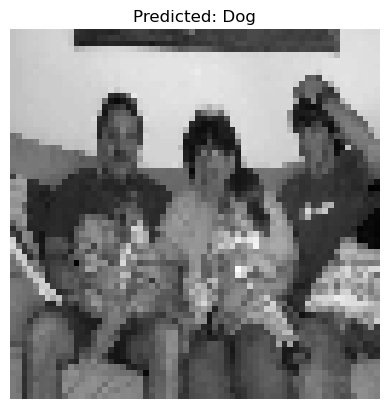

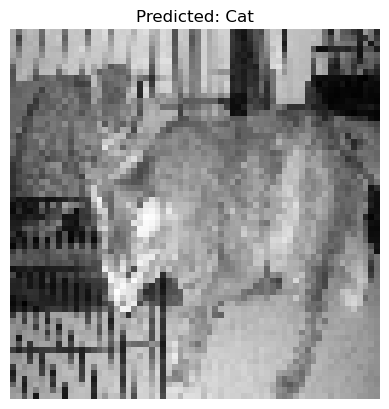

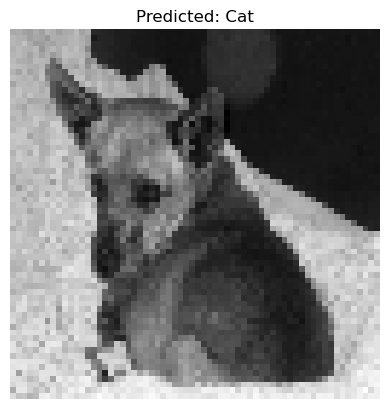

In [17]:
for i in range(5):
    plt.imshow(X_test[i].reshape(img_size, img_size), cmap='gray')
    plt.title(f"Predicted: {'Dog' if y_pred[i] else 'Cat'}")
    plt.axis('off')
    plt.show()